<center><h1>Comparision Between Clustering Algorithms for Customer Segmentation</h1></center>

<hr/>

<center><h3>K-Means Clustering V/S Hierarchical Clustering</h3></center>

<p>Identification of customers based on their choices and other behaviors is an important strategy in any organization. This identification may help in approaching customers with specific offers and products. An organization with a large number of customers may experience difficulty in identifying and placing into a record each customer individually. A huge amount of data processing and automated techniques are involved in extracting insights from the large information collected on customers.</p>

<p>Clustering, an unsupervised technique in machine learning (ML), helps identify customers based on their key characteristics. In this article, we will discuss the identification and segmentation of customers using two clustering techniques – K-Means clustering and hierarchical clustering. We will see the result of clustering when we implement these techniques in Python. Finally, we will discuss the comparison between these two clustering techniques – K-Means and Hierarchical clustering.</p>

In [17]:
# Import all the Important Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Clustering Modules
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Supress 'Deprecated' Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload Dataset and Biffurcate Usefull 'Features' from it
dataset = pd.read_csv('/Users/jaypatel/Documents/University Material/Semester 8/IBM Project Code Files/RFM Analysis/data/Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [6]:
# Print Few Entries of 'X' Which is 'Annual Income' and 'Spending Score' 
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

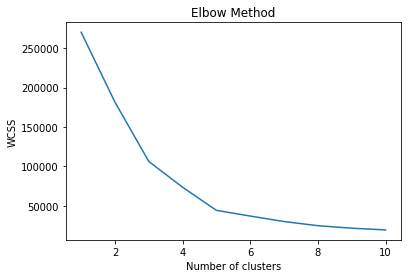

In [9]:
# In order to implement the K-Means clustering, we need to find the optimal number of clusters in which customers will be placed. 
# To find the optimal number of clusters for K-Means, the Elbow method is used based on Within-Cluster-Sum-of-Squares (WCSS)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
# After finding the optimal number of clusters, fit the K-Means clustering model to the dataset defined in the second step and then predict clusters for each of the data elements. 
# It means it will predict which of the 5 clusters the data item will belong to.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

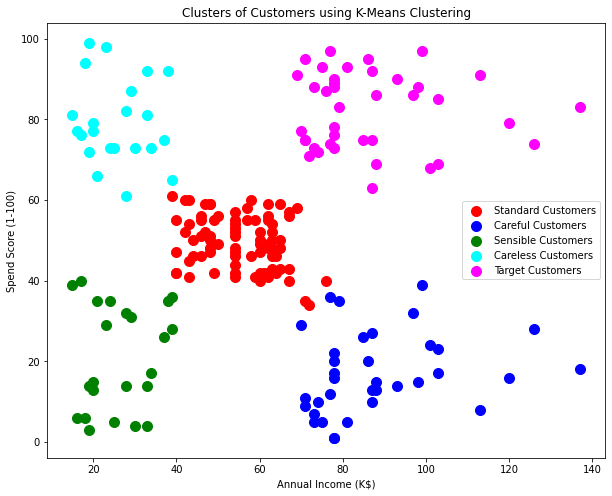

In [12]:
# When the algorithm predicts a cluster for each of the data items, we need to visualize the result through the plot. 
# For better representation, we need to give each of the clusters a unique colour and name.
plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard Customers')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful Customers')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible Customers')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.title('Clusters of Customers using K-Means Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spend Score (1-100)')
plt.legend()
plt.show()

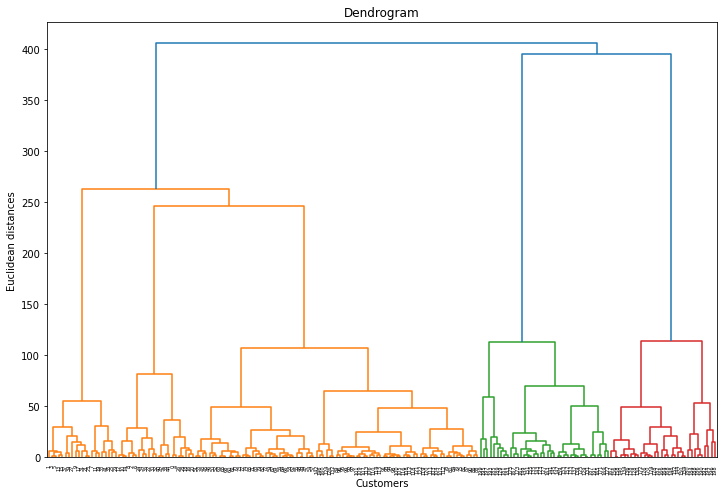

In [16]:
# In K-Means, the number of optimal clusters was found using the elbow method. 
# In hierarchical clustering, the dendrograms are used for this purpose. The below lines of code plot a dendrogram for our dataset.
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [18]:
# Now we train the hierarchical clustering algorithm and predict the cluster for each data point.
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

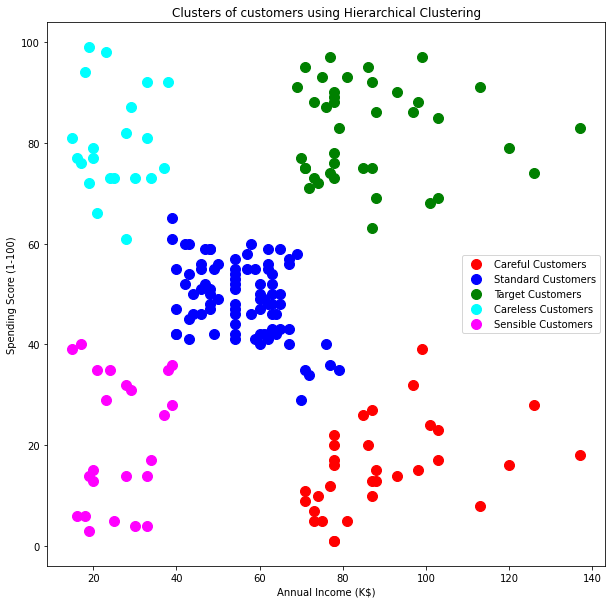

In [20]:
# Once the algorithm predicts the cluster for each of the data points, it can be visualized now.
plt.figure(figsize=(10,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful Customers')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard Customers')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target Customers')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless Customers')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible Customers')
plt.title('Clusters of customers using Hierarchical Clustering')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Conclusion of Comparision Between K-Means Clustering V/S Hierarchal Clustering

<p>As we have seen in the above section, the results of both the clustering are almost similar to the same dataset. It may be possible that when we have a very large dataset, the shape of clusters may differ a little. However, along with many similarities, these two techniques have some differences also. The below table shows the comparison between K-Means and Hierarchical clustering algorithms based on our implementations.</p>

<img src= "/Users/jaypatel/Documents/University Material/Semester 8/IBM Project Code Files/RFM Analysis/img/K_Means And Hierarchal Clustering.png"></img>